In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from __future__ import print_function

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
pixels = train.drop(labels = ["label"], axis = 1)

In [3]:
number_labels = train["label"]

In [4]:
X_1s = pixels[train['label'] == 1]
X_1s = X_1s / 255.0
X_1s = X_1s.values.reshape(-1, 1, 28*28)
X_1s = X_1s[:4000, : , :]

X_2s = pixels[train['label'] == 2]
X_2s = X_2s / 255.0
X_2s = X_2s.values.reshape(-1, 1, 28*28)
X_2s = X_1s[:4000, : , :]

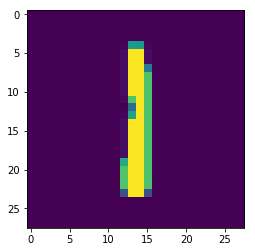

In [6]:
g = plt.imshow(X_1s[1].reshape(28,28))

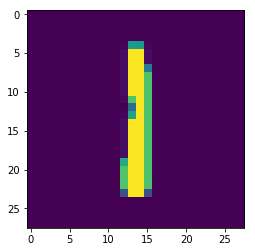

In [7]:
g = plt.imshow(X_2s[1].reshape(28,28))

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
from torch.autograd import Variable

import torchvision
import torchvision.transforms

In [9]:
class twoGenerator(nn.Module):
    """Generate 2 from 1"""
    def __init__(self):
        super(twoGenerator, self).__init__()
        self.fc1 = nn.Linear(28*28, 240)
        self.fc2 = nn.Linear(240, 28*28)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [10]:
cuda_available = torch.cuda.is_available()

In [43]:
net = twoGenerator()
print(net)

net = twoGenerator()
if cuda_available:
    net = net.cuda()
    
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)
criterion = nn.MSELoss()

twoGenerator(
  (fc1): Linear(in_features=784, out_features=240)
  (fc2): Linear(in_features=240, out_features=784)
)


In [117]:
for epoch in range(2000):
    Losses = []
    np.random.shuffle(X_1s)
    np.random.shuffle(X_2s)
    
    X_input  = torch.from_numpy(X_1s).float()
    Y_target = torch.from_numpy(X_2s).float()
    
    for i in range(20):
        X_batch = X_input[i*200:(i+1)*200, :, :]
        Y_batch = Y_target[i*200:(i+1)*200, :, :]
        
        if cuda_available:
            X_batch, Y_batch = X_batch.cuda(), Y_batch.cuda()

        optimizer.zero_grad()
        inputs, targets = Variable(X_batch), Variable(Y_batch)
        outputs = net(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        Losses.append(loss.data[0])

    print('Epoch : %d Loss : %.5f ' % (epoch, np.mean(Losses)))

Epoch : 0 Loss : 0.00021 
Epoch : 1 Loss : 0.00021 
Epoch : 2 Loss : 0.00021 
Epoch : 3 Loss : 0.00021 
Epoch : 4 Loss : 0.00021 
Epoch : 5 Loss : 0.00020 
Epoch : 6 Loss : 0.00020 
Epoch : 7 Loss : 0.00020 
Epoch : 8 Loss : 0.00020 
Epoch : 9 Loss : 0.00020 
Epoch : 10 Loss : 0.00020 
Epoch : 11 Loss : 0.00020 
Epoch : 12 Loss : 0.00020 
Epoch : 13 Loss : 0.00020 
Epoch : 14 Loss : 0.00020 
Epoch : 15 Loss : 0.00020 
Epoch : 16 Loss : 0.00020 
Epoch : 17 Loss : 0.00020 
Epoch : 18 Loss : 0.00020 
Epoch : 19 Loss : 0.00020 
Epoch : 20 Loss : 0.00020 
Epoch : 21 Loss : 0.00020 
Epoch : 22 Loss : 0.00020 
Epoch : 23 Loss : 0.00020 
Epoch : 24 Loss : 0.00020 
Epoch : 25 Loss : 0.00020 
Epoch : 26 Loss : 0.00020 
Epoch : 27 Loss : 0.00020 
Epoch : 28 Loss : 0.00020 
Epoch : 29 Loss : 0.00020 
Epoch : 30 Loss : 0.00020 
Epoch : 31 Loss : 0.00020 
Epoch : 32 Loss : 0.00020 
Epoch : 33 Loss : 0.00020 
Epoch : 34 Loss : 0.00020 
Epoch : 35 Loss : 0.00020 
Epoch : 36 Loss : 0.00020 
Epoch : 37 

In [141]:
# Test Time!

In [127]:
test_cases = X_input[:100, :, :]

if cuda_available:
    test_cases = X_batch.cuda()

test_variable =  Variable(test_cases)
outputs = net(test_variable)

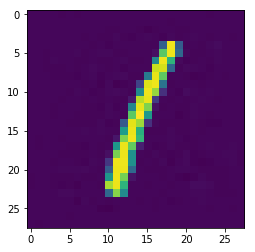

In [128]:
g = plt.imshow(outputs[0].data.cpu().numpy().reshape(28, 28))

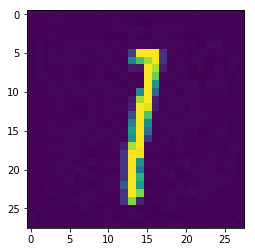

In [129]:
g = plt.imshow(outputs[1].data.cpu().numpy().reshape(28, 28))

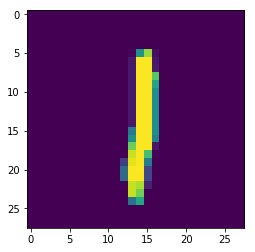

In [130]:
g = plt.imshow(X_1s[0].reshape(28,28))

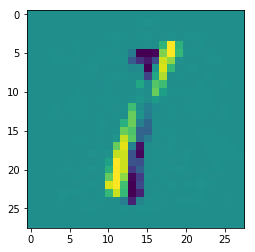

In [131]:
g = plt.imshow(outputs[0].data.cpu().numpy().reshape(28, 28)-outputs[1].data.cpu().numpy().reshape(28, 28))